In [33]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [34]:
columns=['ds','y']
df=pd.read_table('../lstm/lstmData/lstmPrac12.csv', sep=',',header=None,names=columns )
sales=list(df['y'])
sales
df['y']=np.log(df['y'])

In [42]:
df

,ds,y
0,2010-02-05,10.123607
1,2010-02-12,10.737255
2,2010-02-19,10.635748
3,2010-02-26,9.873211
4,2010-03-05,9.990944
5,2010-03-12,9.954342
6,2010-03-19,10.004989
7,2010-03-26,10.174629
8,2010-04-02,10.955330
9,2010-04-09,10.668046


Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


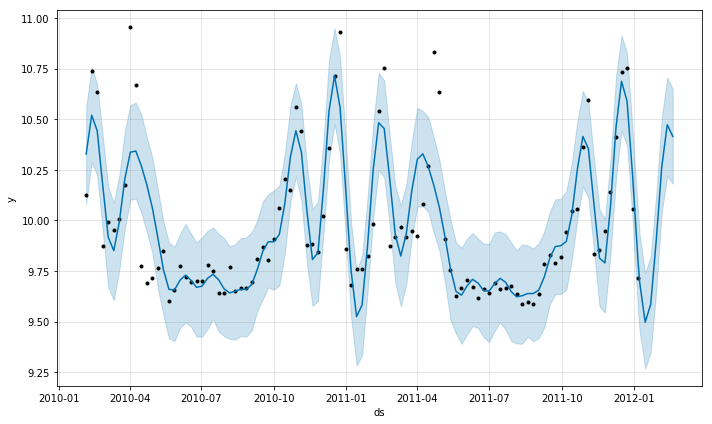

In [47]:
#값에 0이 있으면 log를 할 때 inf가 되므로 Initialization failed. 오류가 나니 주의할 것.
m = Prophet(yearly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=7, freq='W')
fcst=m.predict(future)
m.plot(fcst)

In [48]:
fcst[-42:]

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
66,2011-05-13,0.660000,9.950969,-0.189025,-0.189025,9.950969,9.950969,9.510661,10.005909,-0.189025,-0.189025,-0.189025,-0.189025,9.761944
67,2011-05-20,0.670000,9.950585,-0.300814,-0.300814,9.950585,9.950585,9.441144,9.892019,-0.300814,-0.300814,-0.300814,-0.300814,9.649771
68,2011-05-27,0.680000,9.950201,-0.319671,-0.319671,9.950201,9.950201,9.389207,9.863892,-0.319671,-0.319671,-0.319671,-0.319671,9.630530
69,2011-06-03,0.690000,9.949817,-0.274428,-0.274428,9.949817,9.949817,9.434980,9.909192,-0.274428,-0.274428,-0.274428,-0.274428,9.675389
70,2011-06-10,0.700000,9.949433,-0.240684,-0.240684,9.949433,9.949433,9.477376,9.937663,-0.240684,-0.240684,-0.240684,-0.240684,9.708749
71,2011-06-17,0.710000,9.949049,-0.258473,-0.258473,9.949049,9.949049,9.468346,9.909633,-0.258473,-0.258473,-0.258473,-0.258473,9.690576
72,2011-06-24,0.720000,9.948665,-0.295436,-0.295436,9.948665,9.948665,9.423423,9.885339,-0.295436,-0.295436,-0.295436,-0.295436,9.653229
73,2011-07-01,0.730000,9.948281,-0.297742,-0.297742,9.948281,9.948281,9.398442,9.883220,-0.297742,-0.297742,-0.297742,-0.297742,9.650539
74,2011-07-08,0.740000,9.947897,-0.261271,-0.261271,9.947897,9.947897,9.453874,9.940321,-0.261271,-0.261271,-0.261271,-0.261271,9.686626
75,2011-07-15,0.750000,9.947513,-0.234170,-0.234170,9.947513,9.947513,9.496819,9.945501,-0.234170,-0.234170,-0.234170,-0.234170,9.713343


In [45]:
list(np.exp(fcst[-42:]['yhat']))

[22971.618091396875,
 23073.539976329084,
 23175.91407453538,
 23278.74239242345,
 23382.026945302889,
 23485.769757425191,
 23589.972862023125,
 23694.638301350558,
 23799.768126722549,
 23905.364398555681,
 24011.429186408161,
 24117.964569020696,
 24224.972634356956,
 24332.455479644621,
 24440.415211416552,
 24548.853945552019,
 24657.773807318059,
 24767.176931411228,
 24877.065461999562,
 24987.441552764303,
 25098.307366942452,
 25209.66507736886,
 25321.516866518941,
 25433.864926551549,
 25546.711459351878,
 25660.058676574317,
 25773.908799686327,
 25888.264060011665,
 26003.126698774035,
 26118.49896714131,
 26234.383126269357,
 26350.781447346464,
 26467.696211638024,
 26585.129710530931,
 26703.084245578655,
 26821.562128546433,
 26940.565681456483,
 27060.097236633363,
 27180.159136750037,
 27300.753734873433,
 27421.883394510711,
 27543.550489655725]